# COGS 109 Final Project - Team 3 Project Code

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 1000
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [2]:
# Load Vehicle Data
vehdata = pd.read_csv('vehicles.csv')

In [3]:
# Drop vehicle data with null values for either odometer or price
modvehdata = vehdata.dropna(subset = ['odometer', 'price'])

In [4]:
# Focus only on the columns of price and odometer as that is what we are performing linear regression on
modvehdata = modvehdata[['price', 'odometer']]

In [5]:
# Drop data with odometer value greater than 300,000,
# as that is the meaningful lifespan of a used car and
# values greater than that may inflate plot (outliers)

modvehdata = modvehdata[modvehdata.odometer <= 300000]

In [6]:
# Remove data where price value is greater than 125,000 to remove possible “joke” listings,
# and 'supercars'
modvehdata = modvehdata[modvehdata.price <= 125000]

# Visualize dataframe
modvehdata

,price,odometer
0,10299,90186.0
1,0,115120.0
2,9500,85000.0
3,3995,212526.0
5,12995,85127.0
...,...,...
539753,12955,74508.0
539755,13995,97545.0
539756,10995,80328.0
539757,6495,83521.0


[[ 0.00000000e+00 -1.44064869e-01  2.97355211e-07]] [23428.05517296]


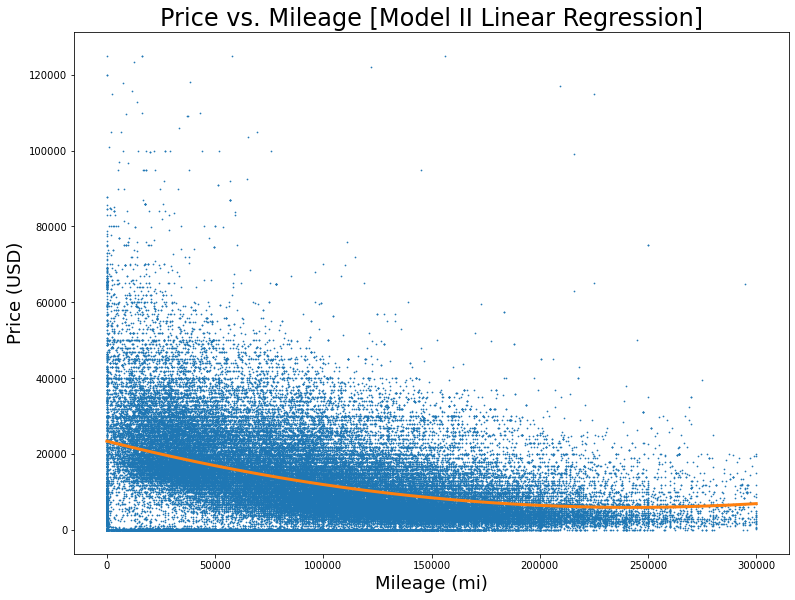

In [7]:
# Create plot figure
fig1, plot1 = plt.subplots(figsize = (12.8, 9.6))

# Create poly_reg degree 2 for Model 2 linear regression
poly_reg = PolynomialFeatures(degree = 2)

# Set X and Y to odometer and price respectively
X = np.array(modvehdata['odometer']).reshape(len(modvehdata['odometer']), 1)
Y = np.array(modvehdata['price']).reshape(len(modvehdata['price']), 1)

# Split data into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Fit to training and test data and transform
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)

# Create Linear Regression object
reg = LinearRegression()

# Fit to traning data
reg.fit(X_poly_train, Y_train)

# Create smooth linspace to plot linear regression line
smooth_linspace = np.linspace(0, 300000, 1000)

# Create linear regression line equation
y_plot = reg.intercept_ + reg.coef_[0, 1] * smooth_linspace + reg.coef_[0, 2] * (smooth_linspace ** 2)

# Plot scatterplot of price vs odometer test data
plot1.scatter(X_test, Y_test, .5)
plot1.set_xlabel('Mileage (mi)', fontsize = 18)
plot1.set_ylabel('Price (USD)', fontsize = 18)
plot1.set_title('Price vs. Mileage [Model II Linear Regression]', fontsize = 24)

# Plot linear regression line
plot1.plot(smooth_linspace, y_plot, 'tab:orange', linewidth = '3')

# Print LinReg coef
print(reg.coef_, reg.intercept_)

Mean Test MSE: 108312373.6603393
Mean Training MSE: 108334884.19742686
Mean Percentage Difference: 0.018646151036005646


(array([  4.,  16.,  42., 108., 212., 215., 216., 113.,  61.,  13.]),
 array([-3.47176506, -2.84205248, -2.2123399 , -1.58262732, -0.95291475,
        -0.32320217,  0.30651041,  0.93622299,  1.56593556,  2.19564814,
         2.82536072]),
 <a list of 10 Patch objects>)

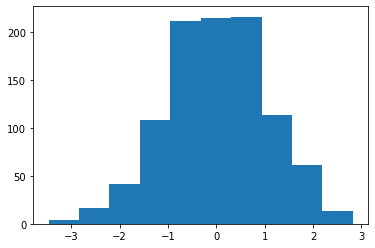

In [8]:
i = 0

# Create array for MSE percentage difference, test mse and training mse
MSE_perc_diff_arr = []
test_mse_arr = []
training_mse_arr = []

while i < 1000:
    
    # Split data into training and test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

    # Fit to training and test data and transform
    X_poly_train = poly_reg.fit_transform(X_train)
    X_poly_test = poly_reg.fit_transform(X_test)


    # Predict train and test values using reg object
    Y_pred_train = reg.predict(X_poly_train)
    Y_pred_test = reg.predict(X_poly_test)

    # Calculate MSE for train and test data
    test_mse = metrics.mean_squared_error(Y_test, Y_pred_test)
    training_mse = metrics.mean_squared_error(Y_train, Y_pred_train)
    
    # Append percentage difference to array
    MSE_perc_diff_arr.append((1 - test_mse / training_mse) * 100)
    
    # Append test_mse to array
    test_mse_arr.append(test_mse)
    
    # Append training_mse to array
    training_mse_arr.append(training_mse)

    i += 1



print('Mean Test MSE:', np.mean(test_mse_arr))
print('Mean Training MSE:', np.mean(training_mse_arr))
print('Mean Percentage Difference:', np.mean(MSE_perc_diff_arr))

plt.hist(MSE_perc_diff_arr)

[Text(0, 0, 'Training MSE'), Text(0, 0, 'Test MSE')]

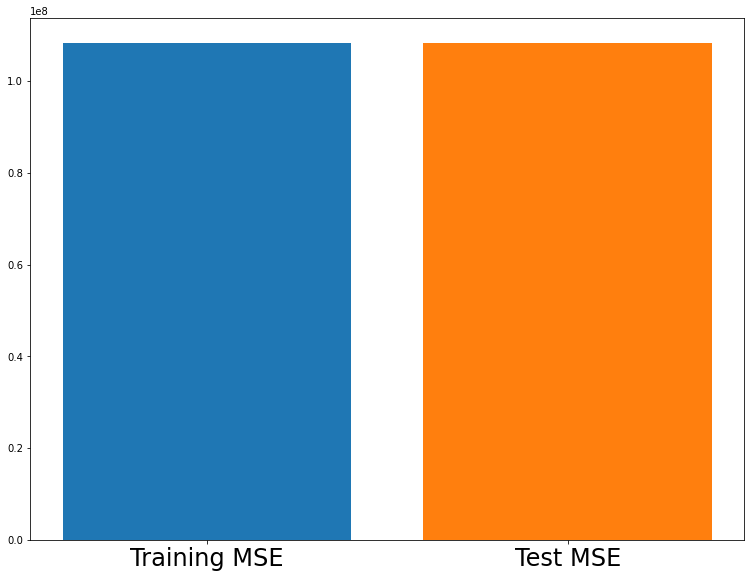

In [9]:
# Create plot figure
fig2, plot2 = plt.subplots(figsize = (12.8, 9.6))

training_mse = np.mean(training_mse_arr)
test_mse = np.mean(test_mse_arr)

# Plot MSE on bar graph
plot2.bar([1], training_mse)
plot2.bar([2], test_mse)

# Set labels for bar graph
plot2.set_xticks([1, 2])
plot2.set_xticklabels(['Training MSE', 'Test MSE'], fontsize = 24)